# 已找有用參考資料
- https://www.itread01.com/content/1566389045.html
- https://medium.com/%E7%84%A1%E9%82%8A%E6%8B%BC%E5%9C%96%E6%A1%86/kaggle-house-price-prediction-competition-%E5%AF%A6%E6%88%B0-ff1c846a9f14
- https://github.com/AdamYuCheng/Machine-Learning/tree/master/Kaggle%20House%20Prediction
- https://zhuanlan.zhihu.com/p/139719435

# Kaggle資料串接
直接從Kaggle串資料，已用我的json串接(省略每次上傳步驟，需要可以直接摳)

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
import os
os.environ['KAGGLE_USERNAME'] = "crazyryan" # username from the json file
os.environ['KAGGLE_KEY'] = "5fc8be3d6107fcff71a432a4fa59b172" # key from the json file

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

train.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


# 資料讀取

In [ ]:
# 請勿更動此區塊程式碼

import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%pylab inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample', 'test', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


 **讀取資料**

In [ ]:
train_path = os.path.abspath('train.csv')
test_path = os.path.abspath('test.csv')
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("訓練資料大小：",train.shape)
print("測試資料大小：",test.shape)

訓練資料大小： (1460, 81)
測試資料大小： (1459, 80)


In [ ]:
#用不到ID 先將其保存後從資料及刪除
train_id=train['Id']
test_id=test['Id']
train=train.drop(columns='Id')
test=test.drop(columns='Id')
#合併訓練和測試資料，以方便做資料處理
combine= pd.concat([train, test], axis=0, ignore_index=True)
#取出SalePrice(即我們要預測的column，並從combine中刪除)
saleprice=train['SalePrice']
combine=combine.drop(columns='SalePrice')
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

可以看到資料集明顯有許多columns都有缺失值

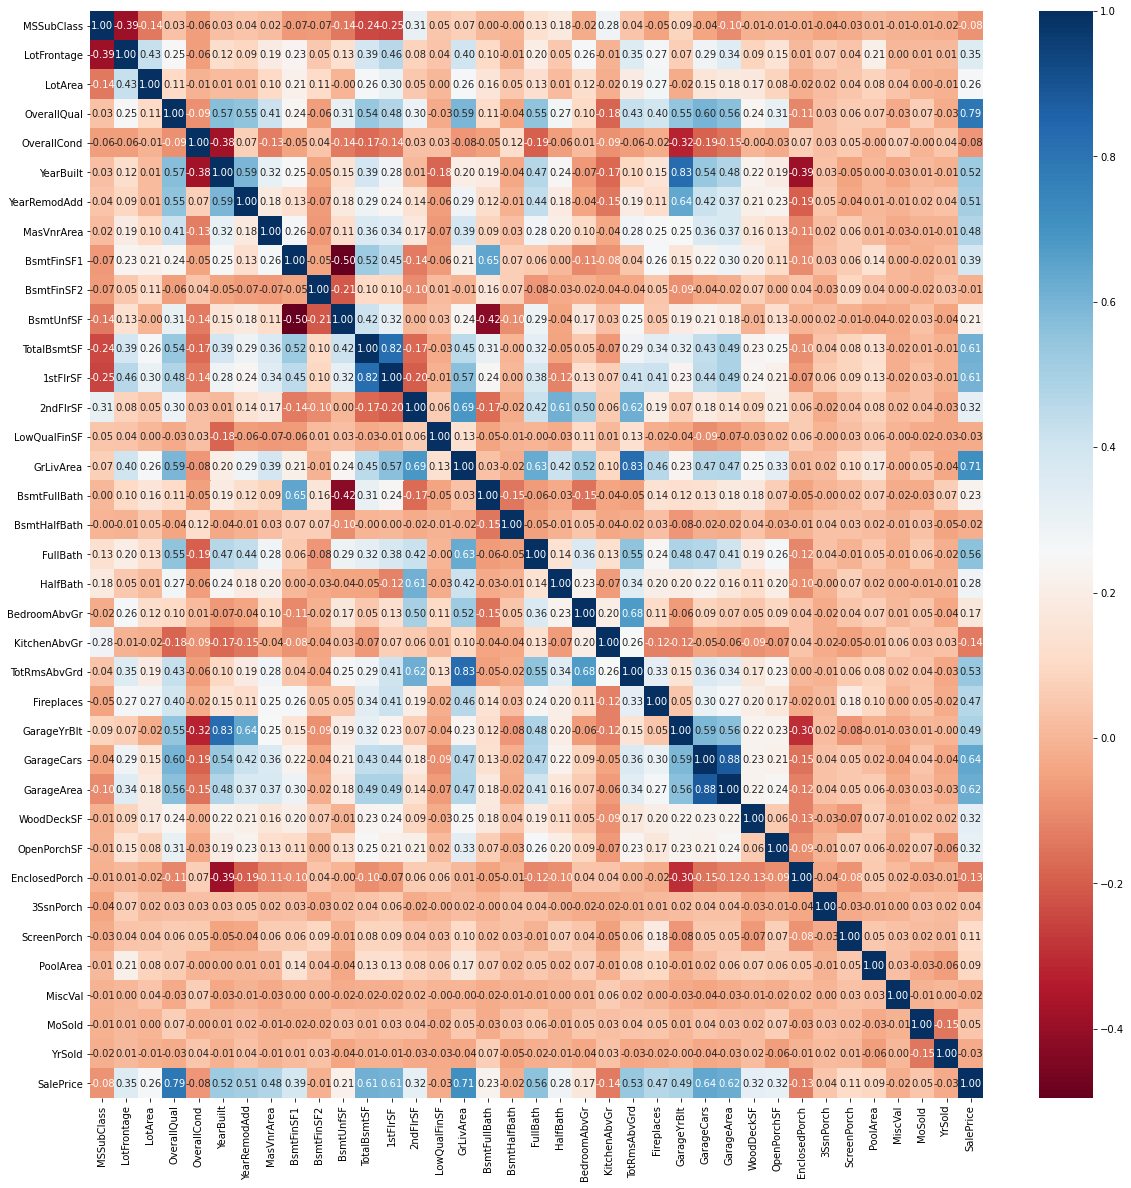

In [ ]:
plt.figure(figsize=(20, 20))
train_corr = train.corr()
sns.heatmap(train_corr, annot=True, fmt = ".2f" ,cmap='RdBu')



*   大部分特徵都和SalePrice正相關


*   OverallQual,GrLivArea和SalePrice相關度極高





# **資料清洗**

**缺失值處理**

In [ ]:
#查看缺失值
missing=combine.isnull().sum()
missing_percent=100*(missing/combine.shape[0])
missing_df=pd.DataFrame({'missing':missing,'missing_percent%':missing_percent})
missing_df=missing_df[missing_df['missing']!=0].sort_values('missing',ascending=False)
missing_df

missing  missing_percent%
PoolQC           2909         99.657417
MiscFeature      2814         96.402878
Alley            2721         93.216855
Fence            2348         80.438506
FireplaceQu      1420         48.646797
LotFrontage       486         16.649538
GarageFinish      159          5.447071
GarageQual        159          5.447071
GarageCond        159          5.447071
GarageYrBlt       159          5.447071
GarageType        157          5.378554
BsmtExposure       82          2.809181
BsmtCond           82          2.809181
BsmtQual           81          2.774923
BsmtFinType2       80          2.740665
BsmtFinType1       79          2.706406
MasVnrType         24          0.822199
MasVnrArea         23          0.787941
MSZoning            4          0.137033
BsmtFullBath        2          0.068517
BsmtHalfBath        2          0.068517
Functional          2          0.068517
Utilities           2          0.068517
GarageArea          1          0.034258
GarageCars          1          0.034258
Electrical          1          0.034258
KitchenQual         1          0.034258
TotalBsmtSF         1          0.034258
BsmtUnfSF           1          0.034258
BsmtFinSF2          1          0.034258
BsmtFinSF1          1          0.034258
Exterior2nd         1          0.034258
Exterior1st         1          0.034258
SaleType            1          0.034258



*   PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage這些的是缺失值較多的特徵
*   Garage：和車庫有關的特徵有一樣的缺失值
*   Bsmt:和地下室有關的特徵有一樣的缺失值





In [ ]:
#處理缺失值
#用眾數去處理填缺失值
combine['Functional']=combine['Functional'].fillna(combine['Electrical'].mode()[0])
combine['Electrical']=combine['Electrical'].fillna(combine['Electrical'].mode()[0])
combine['KitchenQual'] = combine['KitchenQual'].fillna(combine['KitchenQual'].mode()[0])
combine['Exterior1st'] = combine['Exterior1st'].fillna(combine['Exterior1st'].mode()[0])
combine['Exterior2nd'] = combine['Exterior2nd'].fillna(combine['Exterior2nd'].mode()[0])
combine['SaleType'] = combine['SaleType'].fillna(combine['SaleType'].mode()[0])
#MSZoning和MSSubClass有關，用分组後的數填缺失值
combine['MSZoning'] = combine.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
# LotFrontage和Neighborhood相關，用分组后的中位数替代
combine['LotFrontage'] =combine.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#用0取代Garage的數值型特徵
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars'] :
   combine[col] = combine[col].fillna(0)
#用None取代Garage的文字型特徵
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  combine[col]=combine[col].fillna('None')
#用None替代地下室的文字型特徵 
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    combine[col] = combine[col].fillna('None')  

#剩下的數值型特徵無意義，用0取代
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in combine.columns:
  if combine[i].dtype in numeric_dtypes:
    numeric.append(i)
combine.update(combine[numeric].fillna(0))   
#剩下的文字型特徵無無意義，用0取代
objects=[]
for i in combine.columns:
  if combine[i].dtype== object:
    objects.append(i)
combine.update(combine[objects].fillna('None'))
#刪除缺失值80%以上的特徵
combine.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],inplace=True)


In [ ]:
combine.isnull().sum().value_counts()

0    75
dtype: int64

**異常值處理**

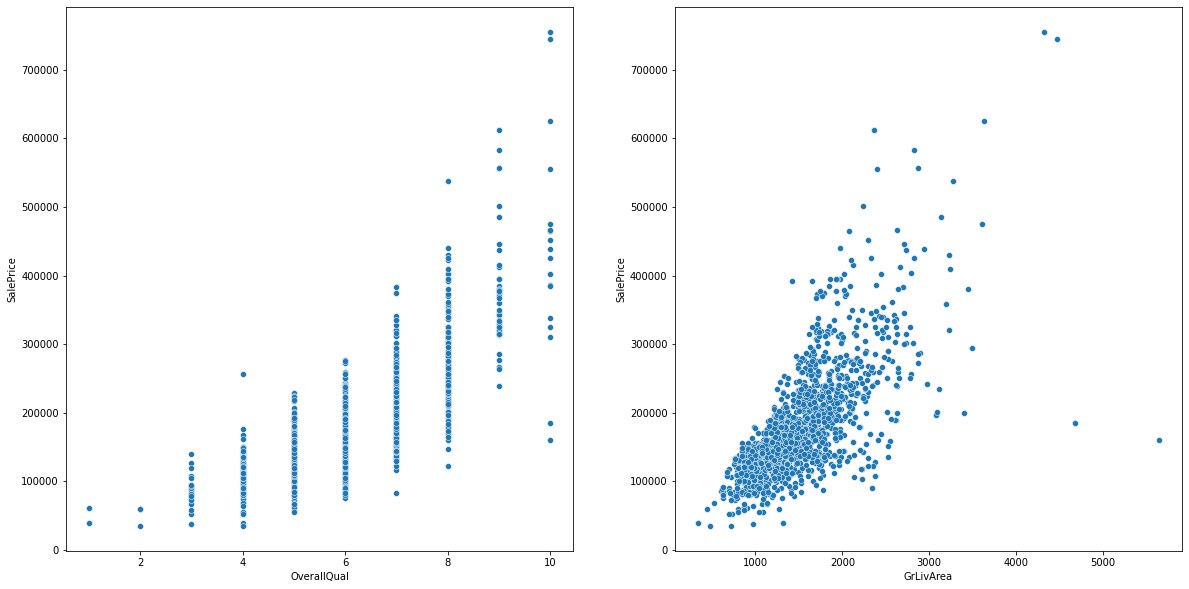

In [ ]:
#選用上面兩個相關度極高的特徵來繪製分佈圖，以尋找離群值
cols=['OverallQual','GrLivArea']
fig,ax=plt.subplots(1,2,figsize=(20,10))
index=0
for col in cols:
  sns.scatterplot(x=train[col],y=train['SalePrice'],ax=ax[index])
  index+=1



*   OverallQual=4時有一個離群值
*   GriLivArea有兩個面積大saleprice卻低得離群值



In [ ]:
#刪除離群值
outlier1 = train[(train['OverallQual']==4) & (train['SalePrice']>200000)].index.tolist()
outlier2 = train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index.tolist()
outliers = list(set(outlier1+outlier2))
# 特徵矩陣以及saleprice都需要删除
combine.drop(index=outliers, inplace=True)
saleprice.drop(index=outliers, inplace=True)
# 重置索引
combine.reset_index(drop=True, inplace=True)
saleprice.reset_index(drop=True, inplace=True)


In [ ]:
combine.shape

(2916, 75)

**區分數字型和文字型特徵**

In [ ]:
#找到數字型特徵
num_col=combine._get_numeric_data().columns.tolist()
#找到文字型特徵
catogo_col=set(combine.columns)-set(num_col)

#算每一個文字型特徵的total value
for i in catogo_col:
  print(combine[i].value_counts())

AllPub    2913
None         2
NoSeWa       1
Name: Utilities, dtype: int64
RL         2264
RM          462
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
TA      1283
Gd      1208
Ex       256
Fa        88
None      81
Name: BsmtQual, dtype: int64
Pave    2904
Grvl      12
Name: Street, dtype: int64
Y    2720
N     196
Name: CentralAir, dtype: int64
Normal     2401
Partial     243
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     269
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
TA      2603
Gd       122
Fa       104
None      82
Po         5
Name: BsmtCond, dtype: int64
Attchd     1721
Detchd      779
BuiltIn     185
None        157
Basment      36
2Types       23
CarPort   

# **EDA**

EDA的目的有：


*   SalePrice的分布為何？
*   特徵和SalePrice的相關性
*   特徵間的相關性






**SalePrice分佈**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text major ticklabel objects>)

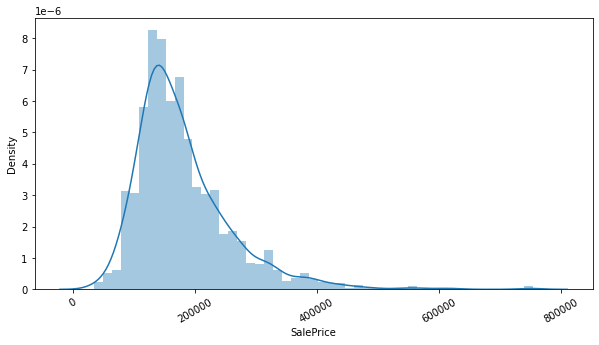

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])
plt.xticks(rotation=30)



*   可發現SalePrice非normal distribution，後面需要處理


**特徵之間的相關性**

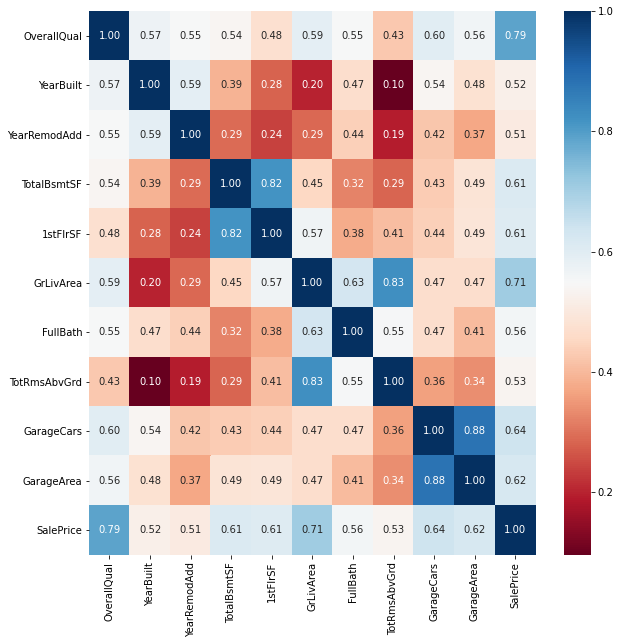

In [ ]:
#因特徵太多，取和saleprice相關的絕對值>0.5的來畫圖
plt.figure(figsize=(10,10))
corrnum=train.corr()
top_cols = corrnum.index[abs(corrnum["SalePrice"])>0.5]
train_corr_top=train.loc[:,top_cols].corr()
sns.heatmap(train_corr_top,annot=True, fmt = ".2f",cmap='RdBu')



*   OverallQual,GrLivArea,GarageCars和SalePrice的相關度極高
*   部分特徵間也存在很高相關度：
    - GarageCars & GarageArea
    - TotRmsAbvGrd和GrLivArea
* 由此可知此資料集可能為多變量線性回歸，應盡量避免使用線性回歸模型




# **特徵工程**

**創建新特徵**


把一些有關係的特徵組合

In [ ]:
#創造新特徵
combine['TotalSF'] = combine['TotalBsmtSF'] + combine['1stFlrSF'] + combine['2ndFlrSF']
combine['YrSinceRemod'] = combine['YrSold'].astype(int) - combine['YearRemodAdd'].astype(int)
combine['YrSinceBuilt'] = combine['YrSold'].astype(int) - combine['YearBuilt'].astype(int)
combine['OverallEval'] = combine['OverallQual'] + combine['OverallCond']
combine['LowQualPct'] = combine['LowQualFinSF'] / combine['TotalSF']
combine['funcSF'] = combine['WoodDeckSF'] + combine['OpenPorchSF'] + combine['EnclosedPorch'] + combine['3SsnPorch'] +combine['ScreenPorch'] + combine['PoolArea']


**有順序的特徵編碼**

有些文字型特徵的值是有順序的，無法用one-hot encoding

In [ ]:
order_map={'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'None':5}
order_cols=['BsmtCond','BsmtQual','ExterCond','ExterQual','FireplaceQu',
            'GarageCond','GarageQual','HeatingQC','KitchenQual']
for col in order_cols:
  combine[col]=combine[col].map(order_map).astype(int)

 **修正資料類型**

將一些數字型特徵修改成文字型（避免後續拿來做計算）

In [ ]:
combine['MSSubClass'] = combine['MSSubClass'].astype(object)
combine['YrSold'] = combine['YrSold'].astype(object)
combine['MoSold'] = combine['MoSold'].astype(object)


**時間類型的特徵編碼**

將有順序性的時間進行編碼

In [ ]:
from sklearn.preprocessing import LabelEncoder
time_cols = ['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']
for col in time_cols:
    combine[col] = LabelEncoder().fit_transform(combine[col])

**數字型特徵的變換**

觀察數值型特徵的分佈，看其是否符合normal disribution

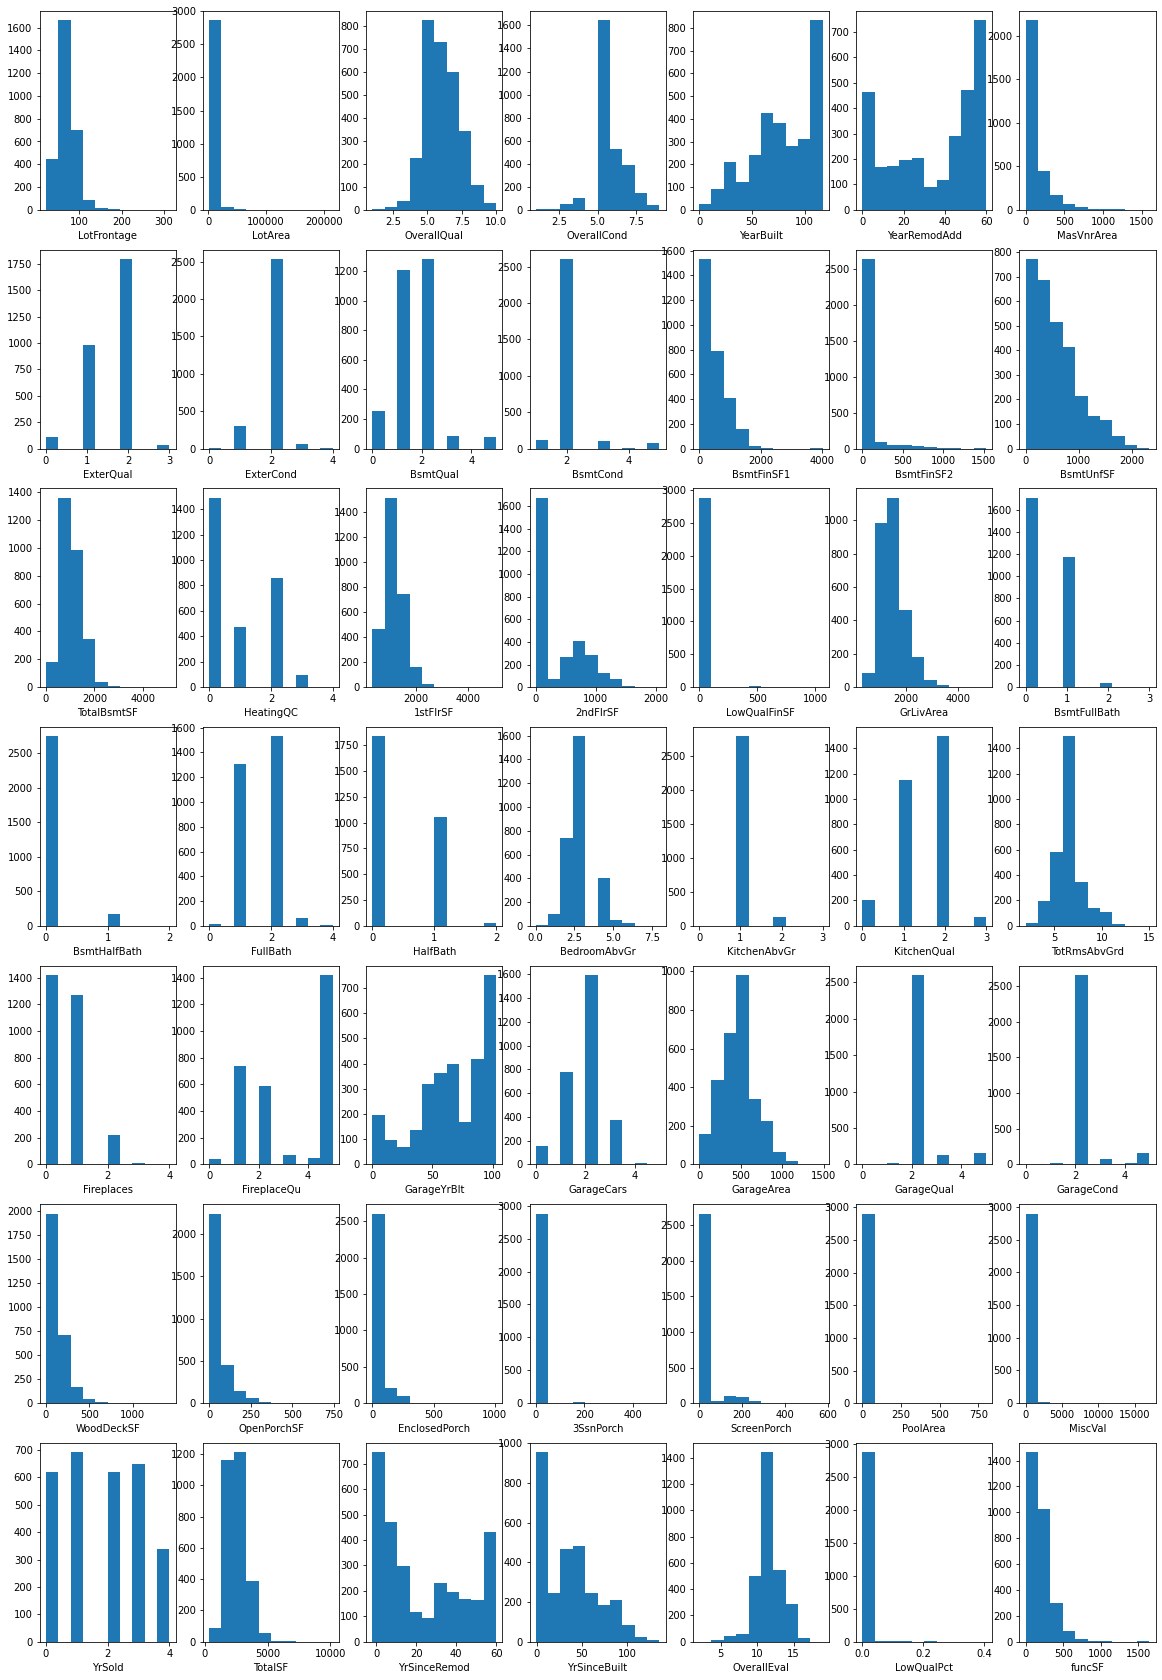

In [ ]:
#找到數字型特徵
num_cols=combine._get_numeric_data().columns.tolist()

#畫圖去看特徵的值的分佈
fig = plt.figure(figsize=(20, 30))
for col in num_cols:
    ax = fig.add_subplot(7, 7, num_cols.index(col)+1)
    ax.set_xlabel(col)
    ax.hist(combine[col])


In [ ]:
# 計算skewed的量
skewed_cols = combine[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_df = pd.DataFrame({'skewed':skewed_cols})
skewed_df

skewed
MiscVal        21.935910
PoolArea       17.685603
LotArea        13.262550
LowQualFinSF   12.082427
LowQualPct     11.610221
3SsnPorch      11.370087
KitchenAbvGr    4.299698
BsmtFinSF2      4.143683
EnclosedPorch   4.001570
ScreenPorch     3.944305
BsmtHalfBath    3.929197
BsmtCond        3.601936
GarageCond      3.380950
GarageQual      3.261552
MasVnrArea      2.621183
OpenPorchSF     2.531807
funcSF          1.895724
WoodDeckSF      1.846168
BsmtQual        1.271083
1stFlrSF        1.258759
LotFrontage     1.103217
GrLivArea       1.068956
TotalSF         1.009740
BsmtFinSF1      0.982003
BsmtUnfSF       0.919162
2ndFlrSF        0.861039
TotRmsAbvGrd    0.748849
Fireplaces      0.725620
HalfBath        0.696122
TotalBsmtSF     0.672442
BsmtFullBath    0.623366
YrSinceBuilt    0.598542
OverallCond     0.569642
HeatingQC       0.548274
YrSinceRemod    0.448898
BedroomAbvGr    0.326012
GarageArea      0.217093
OverallQual     0.189367
FullBath        0.164891
YrSold          0.132135
FireplaceQu    -0.174371
GarageCars     -0.218964
KitchenQual    -0.438145
YearRemodAdd   -0.449662
YearBuilt      -0.502518
OverallEval    -0.568122
GarageYrBlt    -0.742630
ExterQual      -0.782916
ExterCond      -1.314647

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


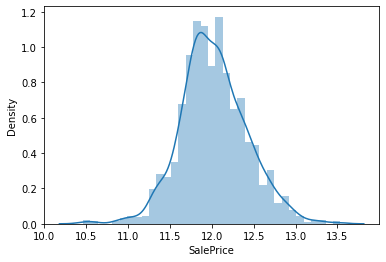

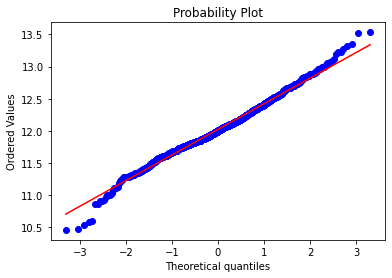

In [ ]:
#skewed偏度的絕對值>1的特徵作對數變換
skewed_cols = skewed_df[skewed_df['skewed'].abs()>1].index.tolist()
for col in skewed_cols:
    combine[col] = np.log1p(combine[col])

#SalePrice也不是normal distribution，一樣進行對數變換
saleprice = np.log1p(saleprice)
sns.distplot(saleprice)
fig = plt.figure()
res = stats.probplot(saleprice, plot=plt)

**One-Hot  encoding**

In [ ]:
#把剩下的文字性特徵編碼
combine= pd.get_dummies(combine)
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Columns: 281 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(30), int64(19), uint8(232)
memory usage: 1.7 MB


**還原訓練和測試資料集**

In [ ]:
train_clean=combine.iloc[:1457,:]
test_clean=combine.iloc[1457:,:]
train_clean=pd.concat([train_clean,saleprice],axis=1)
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


# **模型建立**

**導入套件**

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

**建模**

In [ ]:
#劃分資料集
X=train_clean.drop(columns='SalePrice')
Y=train_clean['SalePrice']

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,train_size=0.7,random_state=10)
print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape) 

(1019, 281)
(438, 281)
(1019,)
(438,)


In [ ]:
#交叉驗證
kf = KFold(n_splits=10, random_state=50, shuffle=True)
def rmse(y, y_pred):
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse

def cv_rmse(model, X=X,Y=Y):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kf))
    return rmse
#建立regression模型
lgb = LGBMRegressor(objective='regression', random_state=50)
xgb = XGBRegressor(objective='reg:linear', random_state=50, silent=True)
rf = RandomForestRegressor(random_state=50)

**模型參數優化**

用GridSearch來將參數優化

In [ ]:
#優化後的模型
best_lgb = LGBMRegressor(objeactive='regression'
                    ,n_estimators=1200
                    ,max_depth=8
                    ,num_leaves=10
                    ,min_data_in_leaf=3
                    ,max_bin=25
                    ,bagging_fraction=0.6
                    ,bagging_freq=11
                    ,feature_fraction=0.6
                    ,learning_rate=0.01
                    ,random_state=50
                    ,n_jobs=4)

best_xgb = XGBRegressor(objective='reg:linear'
                   ,n_estimators=2200
                   ,learning_rate=0.05
                   ,max_depth=3
                   ,subsample=0.6
                   ,min_child_weight=3
                   ,colsample_bytree=0.5
                   ,random_state=50
                   ,n_jobs=4
                   ,silent=True)

best_rf = RandomForestRegressor(n_estimators=70,
                           min_impurity_decrease=0.002,
                           min_weight_fraction_leaf=0.001,
                           min_samples_split=5,
                           random_state=50,
                           n_jobs=4)

In [ ]:
#模型優化後評估
best_models=[best_lgb,best_xgb,best_rf]
best_model_names=[best_lgb,best_xgb,best_rf]
scores = {}
for i, model in enumerate(best_models):
  score=cv_rmse(model)
  scores[best_model_names[i]] = (score.mean(), score.std())

scores_df=pd.DataFrame(scores,index=['rmse_score','rmse_std'])
scores_df.sort_values('rmse_score', axis=1, inplace=True)
scores_df

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=0.5, gamma=0,\n             importance_type='gain', learning_rate=0.05, max_delta_step=0,\n             max_depth=3, min_child_weight=3, missing=None, n_estimators=2200,\n             n_jobs=4, nthread=None, objective='reg:linear', random_state=50,\n             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n             silent=True, subsample=0.6, verbosity=1)  \
rmse_score                                           0.110293                                                                                                                                                                                                                                                                                                                                                                                                                                                                
rmse_std                                             0.014925                                                                                                                                                                                                                                                                                                                                                                                                                                                                

            LGBMRegressor(bagging_fraction=0.6, bagging_freq=11, boosting_type='gbdt',\n              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,\n              importance_type='split', learning_rate=0.01, max_bin=25,\n              max_depth=8, min_child_samples=20, min_child_weight=0.001,\n              min_data_in_leaf=3, min_split_gain=0.0, n_estimators=1200,\n              n_jobs=4, num_leaves=10, objeactive='regression', objective=None,\n              random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent=True,\n              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)  \
rmse_score                                           0.112889                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
rmse_std                                             0.015052                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

            RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',\n                      max_depth=None, max_features='auto', max_leaf_nodes=None,\n                      max_samples=None, min_impurity_decrease=0.002,\n                      min_impurity_split=None, min_samples_leaf=1,\n                      min_samples_split=5, min_weight_fraction_leaf=0.001,\n                      n_estimators=70, n_jobs=4, oob_score=False,\n                      random_state=50, verbose=0, warm_start=False)  
rmse_score                                           0.176201                                               

In [ ]:
scores_df=pd.DataFrame(columns=['XGBRegressor'],index=['rmse_score','rmse_std'])

**選用best_xgb作為最終模型**

In [ ]:
best_xgb.fit(X,Y)
Y_pred = np.exp(best_xgb.predict(test_clean)) - 1
sample = pd.read_csv('sample_submission.csv')
sample['SalePrice'] = Y_pred
sample.to_csv('result.csv', index=False)

In [ ]:
EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 222.09974265098572
